# スクラッチ 決定木

## 決定木学習とは
決定木学習は 決定木 と呼ばれる 木構造のグラフ を作る機械学習手法です。機械学習の分野では学習手法も単に「決定木」と呼ばれます。


分類にも回帰にも使え、分類の場合3クラス以上の多値分類が可能です。ここでは基本となる分類のみを扱います。

決定木とは
決定木は、属性 と 値 の組｛属性1（特徴量の名前）：値1（特徴量の値），属性2：値2, 属性3：値3,…，属性n：値n｝によって表現されたデータを、条件分岐を繰り返すことであるクラスに割り当てることができる木構造のグラフです。


以下の例は会場の気温という属性の値によって、開催と中止のクラスに割り当てるグラフです。「会場の気温という属性（特徴量の名前）の値（特徴量の値）は35以上かどうか」という条件分岐1回による決定木による分類が行えます。例えば36度がこの決定木にインプットされれば、中止というアウトプット（判断）ができます。

![例](https://t.gyazo.com/teams/diveintocode/ca1760b9db2eff08bc82102db1bf7eea.png)

### 各種用語
もう少し複雑な例で決定木で重要な用語を確認します。特徴量が「雨量」「屋内かどうか」「風の強さ」の3種類で、イベントの開催か中止かを分類する場合で考えてみます。訓練データを学習することで、以下のような決定木が作れます。

![例2](https://t.gyazo.com/teams/diveintocode/c927a798dc2292cc05663301dde78632.png)

丸で囲われたひとつひとつを ノード と呼びます。ノードには親子関係を考えることができ、例えば(0)のノードは(1)(2)(3)のノードの 親ノード と呼びます。逆に、(1)(2)(3)のノードは(0)のノードの 子ノード と呼びます。


一番上の(0)は 根ノード 、 末端の(1)(4)(5)(7)(8)(9)のような分類結果を表すノードは 葉ノード と呼びます。


条件分岐の矢印は エッジ と呼びます。あるノードから根ノードまでのエッジの数が 深さ です。(3)の深さは1、(6)の深さは2、(9)の深さは3という風になります。この決定木の最大の深さは3です。


これは(0)に対して(1)(2)(3)の3つのノードが分かれている多岐分岐の決定木ですが、機械学習では2つにしか分かれないものが一般的です。学習時の複雑さを減らすためです。

## 決定木スクラッチ
分類のための決定木のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


決定木の学習には何回まで条件分岐を繰り返すかを表す （最大の）深さ というハイパーパラメータが登場しますが、深さ1の実装を必須課題とします。深さが2以上のものはアドバンス課題とします。


学習の仕方には様々な方法がありますが、ここではscikit-learnでも使用されている CART法 をベースとした実装を行います。この方法では学習の複雑さを減らすために、 分岐は2つに分かれるのみ になります。


以下に雛形を用意してあります。このScratchDecesionTreeClassifierDepth1クラスにコードを書き加えていってください。


### 分割の条件を学習で求める
学習によって、ノードをどういった条件で分割すると、うまく分けられるかということを求めます。


うまく分けられていることを判定するためにノードに対してジニ不純度と情報利得という値を計算します。

## 【問題1】不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。ノード $t$ に対するジニ不純度 $I(t)$ は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。

$$
I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2}
$$

$t$ : ノードのインデックス


$i$ : クラスのインデックス


$K$ : クラスの数


$C_i$ : i番目のクラス


$P(C_i|t)$ :　t番目のノードにおける$C_i$の割合


$N_{t,i}$ : t番目のノードのi番目のクラスに属するサンプル数


$N_{t,all}$ : t番目のノードのサンプルの総数


まずは簡単な例を作り、手計算と関数の結果を比較してください。


《例》


クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000

In [1]:
import numpy as np

In [21]:
def gini(class_list):
    # class_list:(クラス1のサンプル数, クラス2のサンプル数)
    gini = 0
    for i in range(len(class_list)):
        gini += (class_list[i] / sum(class_list))**2
    return 1 - gini

In [22]:
print("クラス1:サンプル数15, クラス2:サンプル数15  ジニ不純度：", gini([15, 15]))
print("クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15  ジニ不純度：", gini([15, 15, 15]))
print("クラス1:サンプル数18, クラス2:サンプル数12  ジニ不純度：", gini([18, 12]))
print("クラス1:サンプル数30, クラス2:サンプル数0  ジニ不純度：", gini([30, 0]))

クラス1:サンプル数15, クラス2:サンプル数15  ジニ不純度： 0.5
クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15  ジニ不純度： 0.6666666666666667
クラス1:サンプル数18, クラス2:サンプル数12  ジニ不純度： 0.48
クラス1:サンプル数30, クラス2:サンプル数0  ジニ不純度： 0.0


## 【問題2】情報利得を求める関数
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 $I(t)$ を計算する関数を呼び出して使います。情報利得$IG$は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。


ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。

$$
IG(p) = I(p)-\frac{N_{left,all}}{N_{p,all}}I(left)-\frac{N_{right,all}}{N_{p,all}}I(right)
$$

$p$ : 親ノードを示すインデックス


$left$ : 左側のノードを示すインデックス


$right$ : 右側のノードを示すインデックス


まずは簡単な例を作り、手計算と関数の結果を比較してください。


《例》


左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143

In [29]:
def IG(class_list_r, class_list_l):
    class_list_p = np.array([sum(class_list_r), sum(class_list_l)])
    ig = gini(class_list_p) - (sum(class_list_l)/sum(class_list_p))*gini(class_list_l)\
    - (sum(class_list_r)/sum(class_list_p))*gini(class_list_r) 
    return ig
    

In [30]:
IG([20, 5], [10, 30])

0.11952662721893492

## 【問題3】学習

空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。


《組み合わせの取り方》


全ての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。今回のスクラッチはこの方法で行なってください。


他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。


《補足》


問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 $I(p)$ は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。

## 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。


入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

In [86]:
import statistics

In [189]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
    def _gini(self, class_list):
        # class_list:(クラス1のサンプル数, クラス2のサンプル数)
        gini = 0
        for i in range(len(class_list)):
            if class_list[i] != 0:
                gini += (class_list[i] / sum(class_list))**2
        return 1 - gini
    
    def _ig(self, class_list_l, class_list_r):
        class_list_p = np.array([sum(class_list_l), sum(class_list_r)])
        ig = self._gini(class_list_p) - (sum(class_list_l)/sum(class_list_p))*self._gini(class_list_l)\
        - (sum(class_list_r)/sum(class_list_p))*self._gini(class_list_r) 
        return ig
    
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        best_ig = 0
        self.best_val_0 = 0
        self.best_val_1 = 0
        self.best_val_2 = 0
        
        for val_0 in list(set(X[:, 0])):
            for val_1 in list(set(X[:, 1])):
                for val_2 in list(set(X[:, 1])):
                    node1_l = X[(val_0 > X[:, 0]) & (val_1 > X[:, 1])]    # node0:左、node1:左
                    node1_r = X[(val_0 > X[:, 0]) & (val_1 <= X[:, 1])]    # node0:左、node1:右
                    node2_l = X[(val_0 <= X[:, 0]) & (val_2 > X[:, 1])]    # node0:右、node1:左
                    node2_r = X[(val_0 <= X[:, 0]) & (val_2 <= X[:, 1])]    # node0:右、node1:右
                    ig = self._ig([len(node1_l), len(node1_r)], [len(node2_l), len(node2_r)])
                
                    if best_ig < ig:
                        best_ig = ig
                        self.best_val_0 = val_0
                        self.best_val_1 = val_1
                        self.best_val_2 = val_2
        
        # 最初に出現した最頻値のyを正解ラベルにする  もし1つもなければ0にする
        y_node1_l = y[(self.best_val_0 > X[:, 0]) & (self.best_val_1 > X[:, 1])]
        y_node1_r = y[(self.best_val_0 > X[:, 0]) & (self.best_val_1 <= X[:, 1])]
        y_node2_l = y[(self.best_val_0 <= X[:, 0]) & (self.best_val_2 > X[:, 1])]
        y_node2_r = y[(self.best_val_0 <= X[:, 0]) & (self.best_val_2 <= X[:, 1])]
        
        if len(y_node1_l) == 0:
            self.yp_node1_l = 0
        else:
            self.yp_node1_l = statistics.mode(y[(self.best_val_0 > X[:, 0]) & (self.best_val_1 > X[:, 1])])
        
        if len(y_node1_r) == 0:
            self.yp_node1_r = 0
        else:
            self.yp_node1_r = statistics.mode(y[(self.best_val_0 > X[:, 0]) & (self.best_val_1 <= X[:, 1])])
        
        if len(y_node2_l) == 0:
            self.yp_node2_l = 0
        else:
            self.yp_node2_l = statistics.mode(y[(self.best_val_0 <= X[:, 0]) & (self.best_val_2 > X[:, 1])])
            
        if len(y_node2_r) == 0:
            self.yp_node2_r = 0
        else:
            self.yp_node2_r = statistics.mode(y[(self.best_val_0 <= X[:, 0]) & (self.best_val_2 <= X[:, 1])])
            
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("best_ig", best_ig)
            print("y_node1_l", y_node1_l)
            print("y_node1_r", y_node1_r)
            print("y_node2_l", y_node2_l)
            print("y_node2_r", y_node2_r)

            print("yp_node1_l", self.yp_node1_l)
            print("yp_node1_r", self.yp_node1_r)
            print("yp_node2_l", self.yp_node2_l)
            print("yp_node2_l", self.yp_node2_r)
    
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        yp = np.zeros(len(X))
        yp[(self.best_val_0 > X[:, 0]) & (self.best_val_1 > X[:, 1])] = self.yp_node1_l
        yp[(self.best_val_0 > X[:, 0]) & (self.best_val_1 <= X[:, 1])] = self.yp_node1_r
        yp[(self.best_val_0 <= X[:, 0]) & (self.best_val_2 > X[:, 1])] = self.yp_node2_l
        yp[(self.best_val_0 <= X[:, 0]) & (self.best_val_2 <= X[:, 1])] = self.yp_node2_r
        
        return yp

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。


In [162]:
# シンプルデータセット2作成
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [186]:
# 分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [190]:
scDT1 = ScratchDecesionTreeClassifierDepth1()

In [191]:
scDT1.fit(X_train, y_train)

In [192]:
yp_train = scDT1.predict(X_train)

In [193]:
# Accuracy(正解率)
from sklearn.metrics import accuracy_score
print("正解率",accuracy_score(yp_train, y_train))

正解率 0.59375


In [194]:
yp_val = scDT1.predict(X_val)

In [195]:
yp_val

array([0., 0., 0., 1., 1., 1., 0., 0.])

In [196]:
y_val

array([1, 0, 1, 1, 1, 0, 1, 0])

In [197]:
print("正解率",accuracy_score(yp_val, y_val))

正解率 0.5


## 【問題6】決定領域の可視化
決定領域を可視化してください。

In [198]:
import matplotlib.pyplot as plt

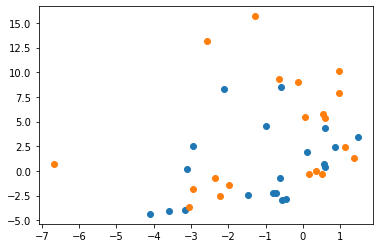

In [199]:
plt.scatter(X[y==0,0],X[y==0,1], label="y=0")
plt.scatter(X[y==1,0],X[y==1,1], label="y=1")

In [200]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [201]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)

    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

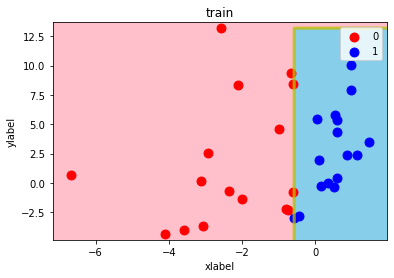

In [202]:
decision_region(X_train,yp_train,scDT1,target_names=['0', '1'],title='train')

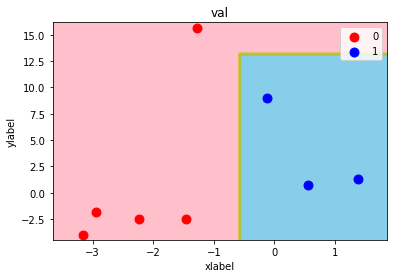

In [203]:
decision_region(X_val,yp_val,scDT1,target_names=['0', '1'],title='val')

In [205]:
scDT2 = ScratchDecesionTreeClassifierDepth1(verbose=True)
scDT2.fit(X_train, y_train)

best_ig 0.5
y_node1_l []
y_node1_r [0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0]
y_node2_l [0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0]
y_node2_r []
yp_node1_l 0
yp_node1_r 0
yp_node2_l 1
yp_node2_l 0


精度が低いのは、ノード1、２での分割で不純度が0の物（割り当てられていない）があるので正解ラベルが0になっているからのようだ